# Exploração da regiões segmentadas

O intuito deste documento é explorar as regiões segmentadas e buscar identificar através do histograma se a região segue alguma distribuição conhecida, como rayleigh, gaussiano, exponencial ou gamma.

Este documento está dividido da seguinte maneira:

- Introdução
- Análise das regiões
- Conclusão Preliminar

# 1 - Introdução

## 1.1 - Importações

In [89]:
import numpy as np
import seaborn as sns
from main import *
import matplotlib.pyplot as plt
from copy import copy

## 1.2 - Referenciando as imagens

A "IMAGE" será o caminho para a imagem original de ultrassom fetal e "SEGMENTED_IMAGE" a mesma imagem porém segmentada nas regiões.

In [158]:
IMAGE = 'images/2007_11_16_0_2.png'
SEGMENTED_IMAGE = 'images/2007_11_16_0_2SEG4.png'

original = cv2.imread(IMAGE, cv2.IMREAD_GRAYSCALE)
segmented = cv2.imread(SEGMENTED_IMAGE, cv2.IMREAD_GRAYSCALE)

assert original.shape == segmented.shape #ambas as imagens devem ter o mesmo tamanho

Vamos visualizar ambas as imagens:

<Figure size 864x576 with 0 Axes>

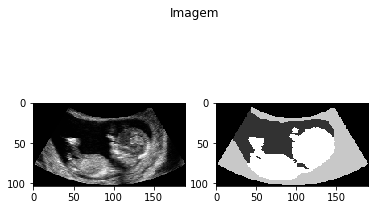

In [92]:
plt.figure(figsize=(12,8))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Imagem')
ax1.imshow(original, cmap='gray')
ax2.imshow(segmented, cmap='gray')

plt.show()

## 1.3 - Destacando as regiões 

<b>Vamos dividir agora os pixels da imagem original que pertencem às seguintes regiões:</b>
- região preta: pixel de intensidade 0 na imagem segmentada;
- região preto-claro: pixel de intensidade 50 na imagem segmentada;
- região cinza: pixel de intensidade 200 na imagem segmentada;
- região branca: pixel de intensidade 255 na imagem segmentada.

In [159]:
"""
Esta função é responsável por destacar os pixels da imagem original
que pertence à região. 
Retorna o título e os pixels da nova imagem.
"""
def highlight_region(title, pixel_intensity, threshold, original, segmented):  
    width, height = original.shape
    
    new_img = copy(original)
    
    for x in range(0, width):
        for y in range(0, height):
            if segmented[x,y] != pixel_intensity:
                new_img[x,y] = threshold
        
    return title, new_img

<Figure size 1728x1152 with 0 Axes>

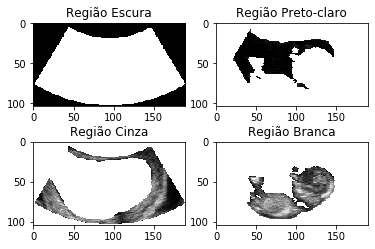

In [160]:
plt.figure(figsize=(24,16))

figure, axarr = plt.subplots(2, 2)

t, img = highlight_region('Região Escura', pixel_intensity=0, threshold=255, original=original, segmented=segmented)
axarr[0, 0].set_title(t)
axarr[0, 0].imshow(img, cmap='gray')

t, img = highlight_region('Região Preto-claro', pixel_intensity=50, threshold=255, original=original, segmented=segmented)
axarr[0, 1].set_title(t)
axarr[0, 1].imshow(img, cmap='gray')


t, img = highlight_region('Região Cinza', pixel_intensity=200, threshold=255, original=original, segmented=segmented)
axarr[1, 0].set_title(t)
axarr[1, 0].imshow(img, cmap='gray')


t, img = highlight_region('Região Branca', pixel_intensity=255, threshold=255, original=original, segmented=segmented)
axarr[1, 1].set_title(t)
axarr[1, 1].imshow(img, cmap='gray')

Agora que temos as regiões fragmentadas, vamos explorar um pouco mais a intesidade dos pixels de cada região, avaliando o histograma de cada região e se pertence a alguma distribuição conhecida.

A função "group_region_pixels" irá agrupar os pixels da imagem original, retornando as intensidades dos pixels. Agora não iremos mais trabalhar diretamente com o posicionamento dos pixels, apenas com as intensidades de pixels que pertencem a cada região.

Portanto essa função retorna um dicionário, onde os índices do dicionário serão:
0, 50, 200, 255, sendo região escura, preto-claro, cinza e branca, respectivamente.

In [122]:
groups = group_region_pixels(original, segmented)
print('As chaves do dicionário "groups" são:')
groups.keys()

As chaves do dicionário "groups" são:


dict_keys([0, 50, 200, 255])

# 2 - Análise das Regiões

Na análise das regiões, vamos compreender quais são a intensidade dos pixels de cada região e ao analisarmos o histograma visualmente, verificar se o mesmo pode-se adequar a uma distribuição já conhecida.

## 2.1 - Região Escura

Para acessarmos a região escura, precisamos acessar groups[0].

In [130]:
"""
Descreve os pixels da região, dizendo a quantidade total, maior e menor intensidade.
Retorna a versão em numpy array da lista.
"""
def desc(region_name, list_group):
    np_region = np.asarray(list_group)
    
    qtd = len(list_group)
    min_val = np_region.min()
    max_val = np_region.max()

    print(f'Há {qtd} pixels na região {region_name}.')
    print(f'A menor intensidade de pixel é {min_val} e a máxima é {max_val}.')
    
    return np_region

In [131]:
np_dark_region = desc('escura', groups[0])

Há 7158 pixels na região escura.
A menor intensidade de pixel é 0 e a máxima é 85.


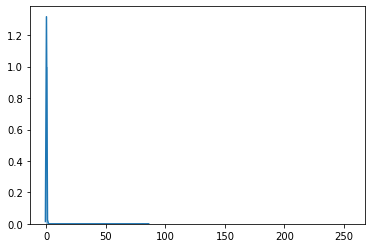

In [142]:
sns.distplot(np_dark_region, bins = range(0,256), norm_hist=True)

### Conclusão


Vemos que a região **escura** possui a grande maioria dos pixels com intensidade 0 (totalmente preto) e alguns pixels outliers diferente de 0.

Dessa forma, torna-se difícil dizer que a **região escura** segue alguma distribuição.

## 2.2 - Região Preto-claro

Para acessarmos a região preto-claros, acessamos groups[50].

In [133]:
np_light_dark_region = desc('escura', groups[50])

Há 3431 pixels na região escura.
A menor intensidade de pixel é 1 e a máxima é 85.


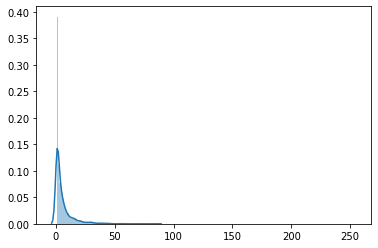

In [143]:
sns.distplot(np_light_dark_region, bins = range(0,256), norm_hist=True)

Nesta região, o comportamento já é um pouco diferente. Se parece com a distribuição **exponencial**. 

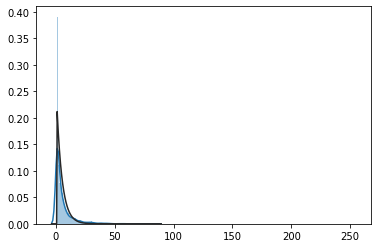

In [151]:
import scipy.stats as st
sns.distplot(np_light_dark_region, bins = range(0,256), fit=st.expon, norm_hist=True)

#### Conclusão:

Podemos realizar o teste do qui-quadrado para avaliar a adequação da região preto-claro em relação à distribuição exponencial.

## 2.3 - Região Cinza

Para acessarmos a região cinza, usamos groups[200].

In [140]:
np_grey_region = desc('cinza', groups[200])

Há 4995 pixels na região cinza.
A menor intensidade de pixel é 1 e a máxima é 240.


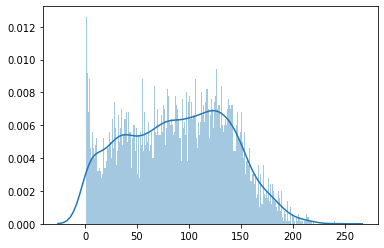

In [145]:
sns.distplot(np_grey_region, bins = range(0,256), norm_hist=True)

#### Conclusão:

Não é possível inferir nada referente à região cinza.

## 2.4 - Região Branca

Para acessarmos a região branca, usamos groups[255].

In [146]:
np_white_region = desc('branca', groups[255])

Há 4176 pixels na região branca.
A menor intensidade de pixel é 3 e a máxima é 248.


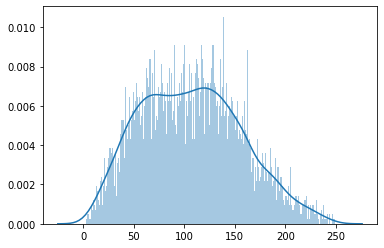

In [147]:
sns.distplot(np_white_region, bins = range(0,256), norm_hist=True)

Será que se parece com a normal?

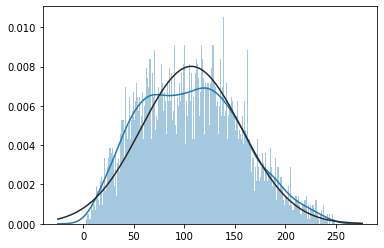

In [148]:
sns.distplot(np_white_region, bins = range(0,256), norm_hist=True, fit=st.norm)

#### Conclusão:

Não é possível inferir nada sobre a região branca.

# 3 - Conclusão Preliminar

Não foi possível avaliar a primeiro momento a adequação de nenhuma das regiões às distribuições conhecidas, como gaussiano, exponencial, gamma ou rayleigh, com ressalvo à região cinza, que pode estar relacionada à dsitribuição exponencial.